```
Drs. Allison Horst, Alison Presmanes Hill (RStudio), and Dr. Kristen  
B. Gorman (Palmer Station, University of Alaska Fairbanks)  
collaborated on developing the palmerpenguins R package. The dataset  
features structural size measurements for three penguin  
species: Adelie, Gentoo, and Chinstrap. The meticulous work  
conducted by Dr. Kristen B. Gorman and her team at Palmer Station  
Long-Term Ecological Research site in Antarctica exemplifies their  
curiosity, attention to detail, and adherence to rigorous  
methodologies, resulting in high-quality data.

In addition to Ronald Fisher's Iris dataset, the palmerpenguins  
dataset offers distinct variables that enable researchers and  
practitioners to perform comprehensive analyses and conduct  
algorithmic testing. By utilizing both datasets as benchmarks,  
professionals can expand the application of machine learning  
algorithms while enhancing their appreciation of the penguin  
species.
```
dataset home: https://allisonhorst.github.io/palmerpenguins/  
git fanClub: https://github.com/mcnakhaee/palmerpenguins  

## **`palmerpenguins assignment overview`**


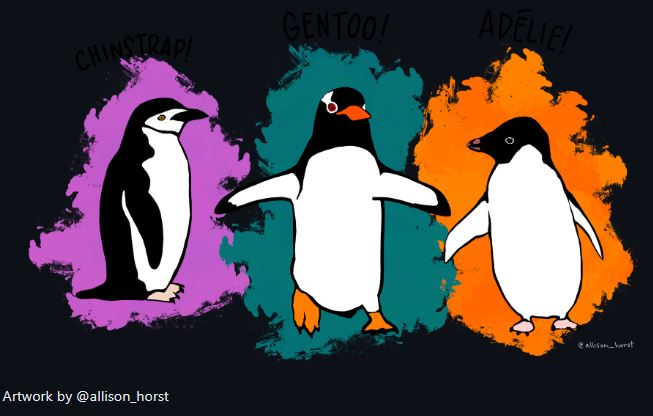

**`Stage.1=> Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

**`Stage.2=> Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

**`Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning`**  
```
- 3. Fine-tune the hyperparameters to optimize their performance.  
-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.  
- 3 Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- Attempt to tune a couple parameters and add a bullet of what you  
did in the executive summary.  


**`Part 4=> Model Interpretation and Validation`**  
```
- 4.1 Interpret the trained models to understand the relationship  
=> between their features and the predicted penguin species.  
- 4.2 Ensure robustness and reliability and validate with items like    
=>  k-fold, cross-validation, and holdout to name a few.  
```

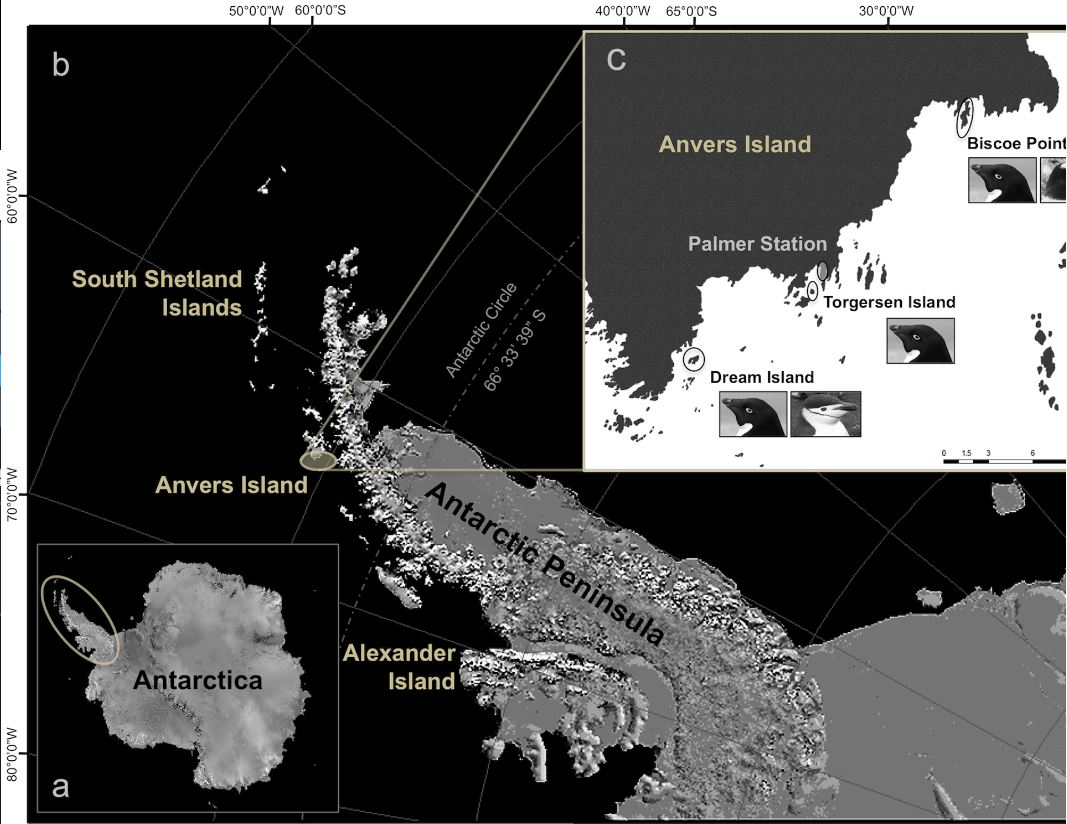  

References  
Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081  
- [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)  

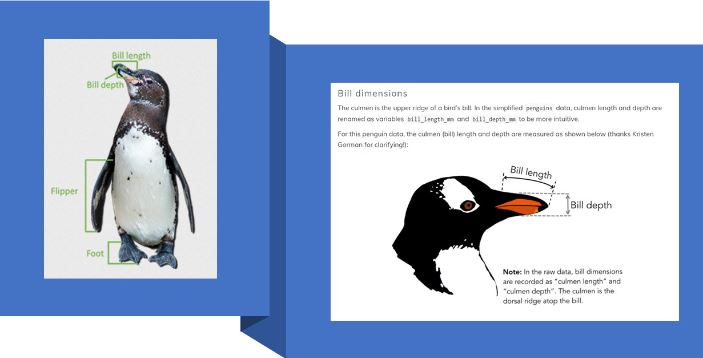


## **`Penguin`** **=>** **`Enter Your Executive Summary`**

### **`Executive Summary`**

### `From the reading can summarize an important fact about Sex Prediction Accuracy:`
### => Some models receiving AICc's criterion ΔAICc values ≤2 accurately predicted sex for:
- ### 88.64% of the adult Adélie penguins,
- ### 94.44% of the chinstrap penguins, and
- ### 89.47% of the gentoo penguins.
##### `The results indicate that sexual size dimorphism (SSD) in penguins can be quantified and sex can be predicted with a fairly high accuracy using measurements such as bill length and depth, and body mass. This contributes to the understanding of sexual dimorphism and its ecological implications in these species.`


## **`Stage 2=> Feature Selection and Engineering`**  
```

After observing a few plots to confirm clusters to potential identification of sex by species, I observed that indeed, culmen length, depth, and mass are features that we can use to identify sex or species.

As part of Feature Selection and Engineering, I decided to fill empty values with mean and mode for numeric and categorical values respectively because the missing data was minimal and I thought it made sense to use mean and mode for this particular case.

While testing for data normalization before and after computing values it seems like the data was not highly skewed, but there was a potential prediction improvement in scaling every feature. After some research a few different tests, I opted to reshape each feature data with MinMax so that feature data mean would be in the same range.

```

## **`Stage 3=> (Pick 4) Machine learning and Hyperparameter Tuning`**  
```
I originally thought to use a new feature bill_length_mm * bill_depth_mm * body_mass_g to predict sex. However, accuracy and scores were not working as expected. So, I opted to change to use logistic regresssion removing 'sex' and 'species' to predict species as target variable.

After using train_test_split feature to create train, test, and holdout data, I started playing with some hyperparameters and ultimately added cross-validation for a few more models:
```

- ### Logistic Regression  :  93%
- ### Decision Tree  :  90%
- ### Random Forest  :  94%
- ### k-Nearest Neighbor  :  99%
- ### Support Vector Machine  :  99%


## **`Stage 4=> Model Interpretation and Validation`**  
```
Overall, it seems that cross-validation score demonstrated that some models performed slightly better holdout data than with the training 
data.

I did not observe any significant change in score accuracy when using different folds or other parameters such as max_iter for LogisticRegression.

```


 => ### Adelie


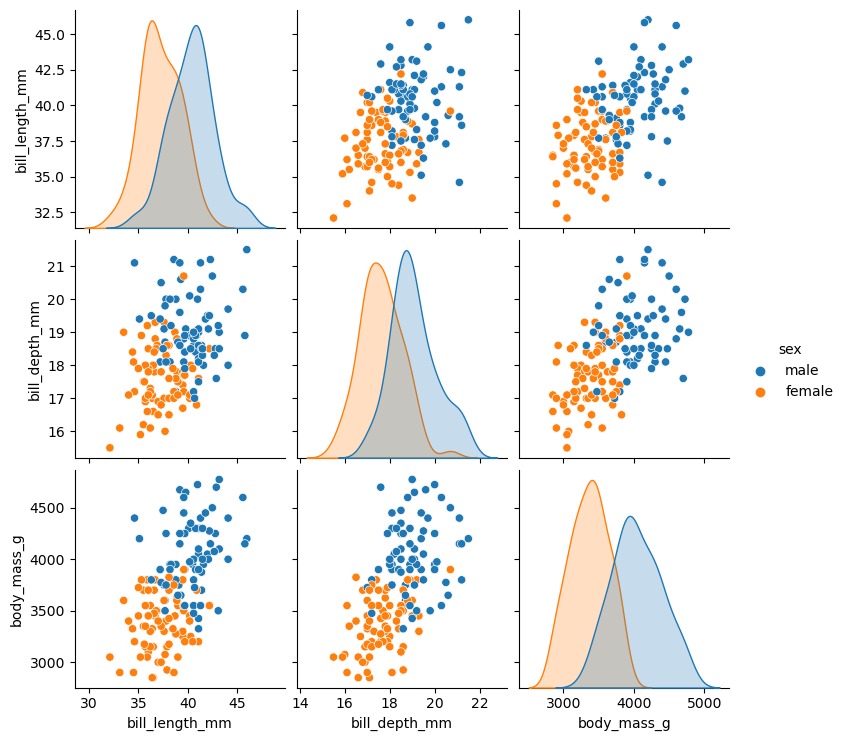


 => ### Gentoo


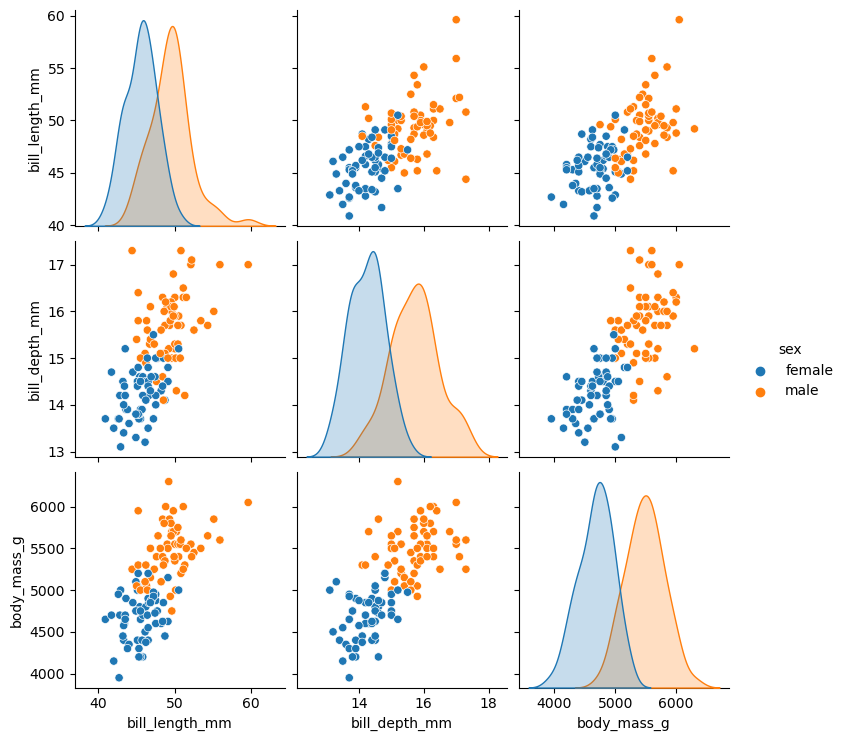


 => ### Chinstrap


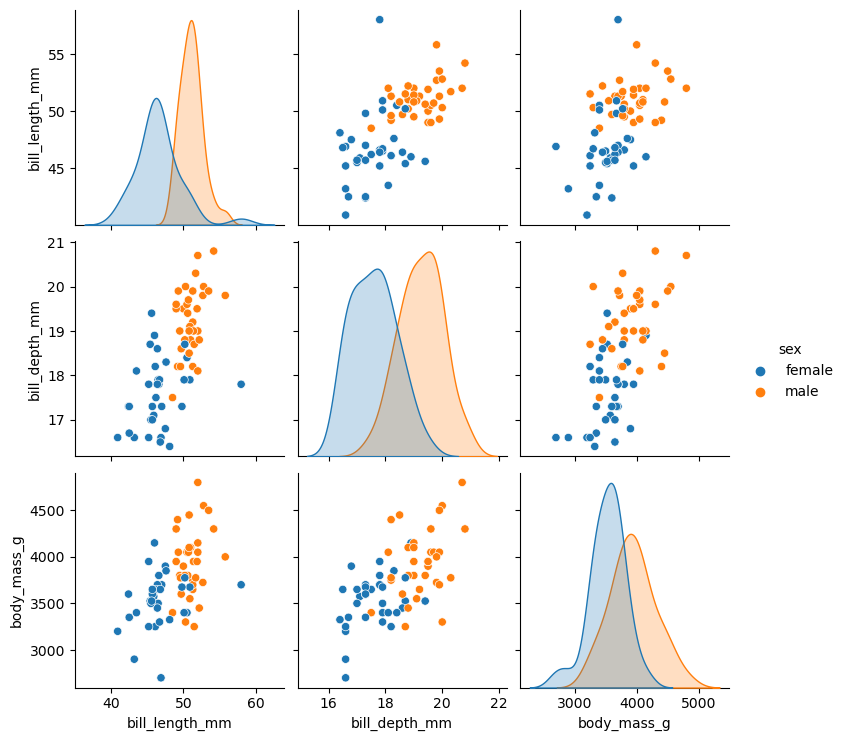

In [172]:
#=>Answer: Executive summary about dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins  #via !pip install palmerpenguins

# format float number to display only 1 decimal place
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df = load_penguins()

# Count the missing values in each column
missing_values = df.isnull().sum()

#get unique species
species_list = df['species'].unique()

# Create a separate pairplot for each species
for species in species_list:
    subset_df = df[df['species'] == species]
    print("\n => ###",species)
    sns.pairplot(subset_df, hue='sex', vars=['bill_length_mm', 'bill_depth_mm', 'body_mass_g'])
    #plt.title(species, loc='right')
    plt.show()



## **`Penguin analysis stages`**

### **`Stage.1.`** **=>**  **`Part 1: Dataset Inspection and Preprocessing`**  

**`Stage.1: Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

`Stage.1.Tasks and outcomes`   
`Stage.1.Task.1` => Given prior learnings logically assemble your data preprocessing.   
`Stage.1.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  

In [124]:
#=>Enter Solution analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins  #via !pip install palmerpenguins

# format float number to display only 1 decimal place
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df = load_penguins()

# Count the missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

print("\n")
print(df.describe())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   year
count           342.0          342.0              342.0        342.0  344.0
mean             43.9           17.2              200.9       4201.8 2008.0
std               5.5            2.0               14.1        802.0    0.8
min              32.1           13.1              172.0       2700.0 2007.0
25%              39.2           15.6              190.0       3550.0 2007.0
50%              44.5           17.3              197.0       4050.0 2008.0
75%              48.5           18.7              213.0       4750.0 2009.0
max              59.6           21.5              231.0       6300.0 2009.0


### => `For visualizing the distributions of the features and target variables we will use a histogram`

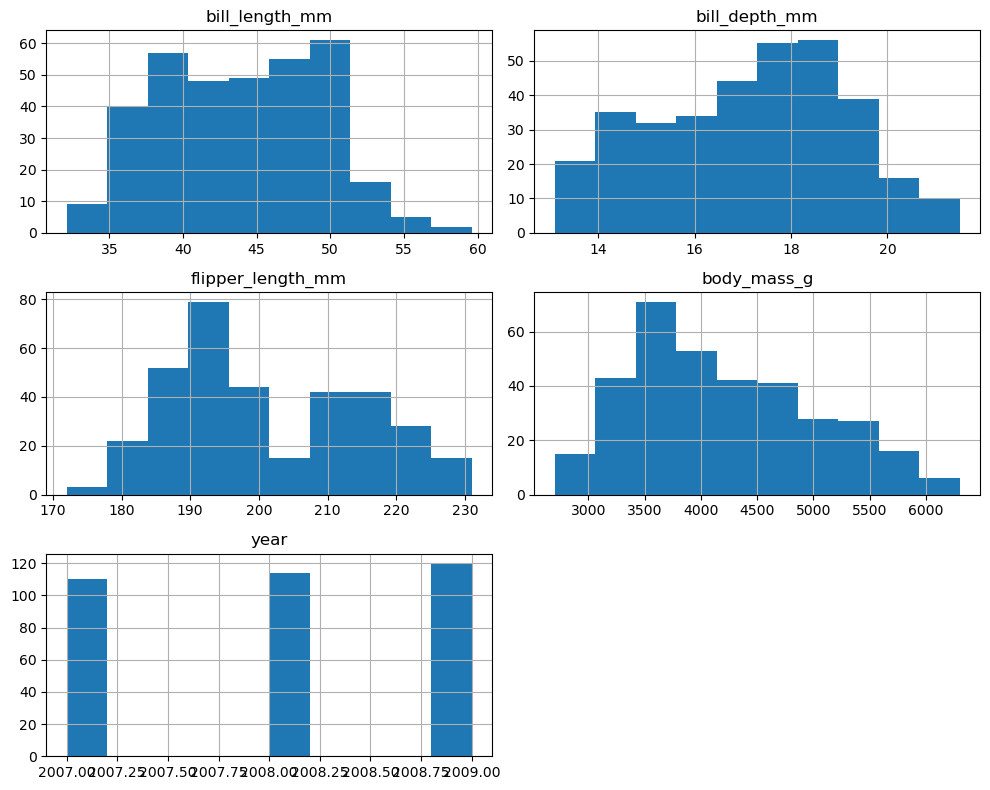

In [127]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### => `To visualize the target variable, we can use a count plot`

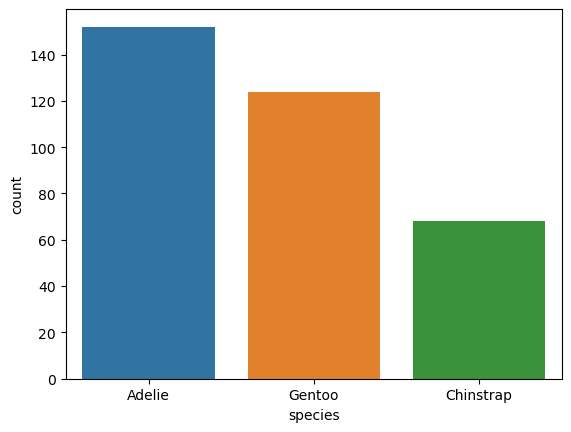

In [128]:
# Visualize target variable distribution
sns.countplot(x='species', data=df)
plt.show()

### => `To assess correlations between variables, we can use a correlation matrix`

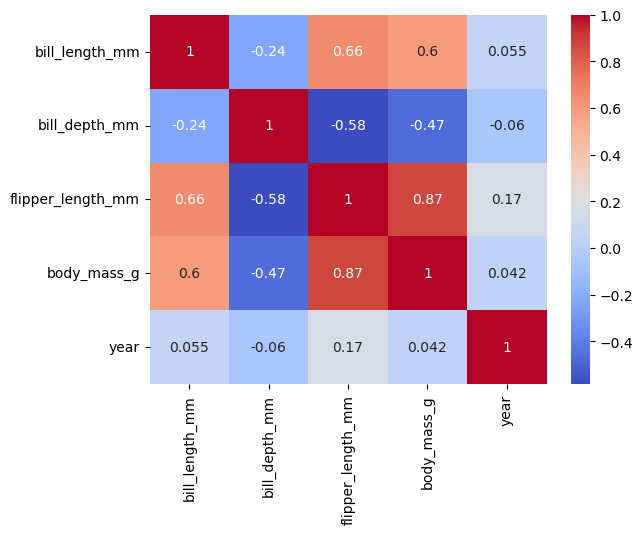

In [129]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

`Helpful outcomes`  

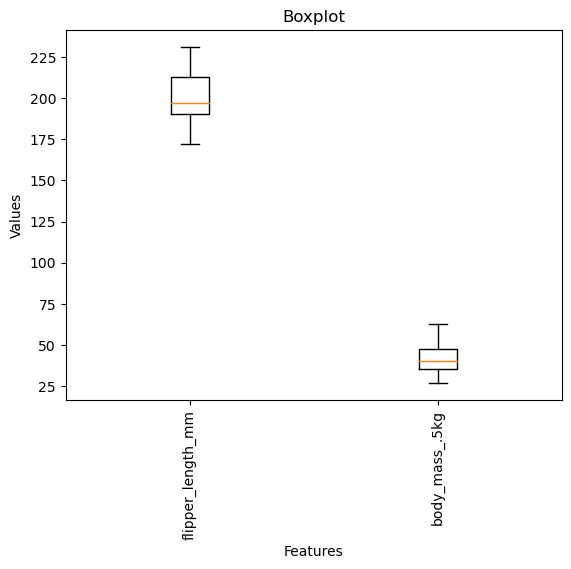

In [130]:
# Assorted Notes and Tips:
#=> data transformations assist with scaling to build compound graphs
#=> Mean subsitution is a viable option. is it worth it?
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins  #via !pip install palmerpenguins
df = load_penguins()
# Divide 'body_mass_g' column by 1000
df['body_mass_.5kg'] = df['body_mass_g'] / 100

df_subset = df.drop(['species', 'sex', 'island','year','body_mass_g','bill_length_mm','bill_depth_mm'], axis=1)
df_subset.dropna(inplace=True)  #drops an NaN data!
plt.boxplot(df_subset.values)
plt.xticks(range(1, len(df_subset.columns) + 1), df_subset.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()

### **`Stage.2`** **=>**  **`Part 2: Feature Selection and Engineering`**  

**`Stage.2: Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

`Stage.2.Tasks and outcomes`  
`Stage.2.Task.1` => Given prior learnings logically assemble your feature selection and engineering.    
`Stage.2.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


#### **`Task.2.solution`**

In [173]:
#=>Enter Answer (may be extended over multiple cells), The end of your answer should show a df.head().
#This is a good place to create an 80 10 10 split for training, validation, and holdout.

# Split the dataset into training, validation, and holdout sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print('Skewness of numeric variables')
print('-' * 35)

for i in df.select_dtypes(['int64', 'float64']).columns.tolist():
    print(i, ' : ',df[i].skew())



new_df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'sex']].copy()

print(new_df.describe())

#fill empty values with mean and mode for numeric and categorical values respectively
new_df['bill_length_mm'].fillna(np.mean(df['bill_length_mm']), inplace = True)
new_df['bill_depth_mm'].fillna(np.mean(df['bill_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(df['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(df['body_mass_g']), inplace = True)
new_df['sex'].fillna(df['sex'].mode()[0], inplace = True)


# Count the missing values in each column
missing_values = new_df.isnull().sum()
print(missing_values)

# Display the head of the training set
print(new_df.head())

print('Skewness of numeric variables')
print('-' * 35)

for i in new_df.select_dtypes(['int64', 'float64']).columns.tolist():
    print(i, ' : ',new_df[i].skew())

# Normalize data with MinMax Scaler
mms = MinMaxScaler()

new_df['bill_length_mm'] = mms.fit_transform(new_df['bill_length_mm'].values.reshape(-1, 1))
new_df['bill_depth_mm'] = mms.fit_transform(new_df['bill_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))
new_df['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

print(new_df.describe())


Skewness of numeric variables
-----------------------------------
bill_length_mm  :  0.05311806699132413
bill_depth_mm  :  -0.14346462519436454
flipper_length_mm  :  0.3456818328687695
body_mass_g  :  0.4703293304801231
year  :  -0.05372776875760637
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count           342.0          342.0              342.0        342.0
mean             43.9           17.2              200.9       4201.8
std               5.5            2.0               14.1        802.0
min              32.1           13.1              172.0       2700.0
25%              39.2           15.6              190.0       3550.0
50%              44.5           17.3              197.0       4050.0
75%              48.5           18.7              213.0       4750.0
max              59.6           21.5              231.0       6300.0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species              0
sex           

### **`Stage.3`** **=>**  **`Pick 4 - Machine learning and Hyperparameter Tuning`**

**`Stage.3: Machine learning and Hyperparameter Tuning`**  
```
- 3.1 Fine-tune the hyperparameters to optimize their performance.  
     Use techniques like grid or random search to explore different  
     combinations of hyperparameters and their configuration.  
-    Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- `Attempt` to tune a couple parameters and add a bullet of what you  
did in the executive summary.

`Stage.3.Tasks and outcomes`  
`Stage.3.Task.1` => Given prior learnings logically assemble your Machine learning and Hyperparameter Tuning.    
`Stage.3.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


`Algorithm homepage with hyperparameters`  

- Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearnlinear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

- Naïve Bayes
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb

- k-Nearest Neighbor
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

- Decision Tree
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

- Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

- Support Vector Machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

- Neural Networks/ Convolutional Neural Networks
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised



In [185]:
#=>Enter Answer (Pick 4 from the above and extend over at least one cell per approach)

# SUPERVISED APPROACH: Logistic Regression


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Drop the string columns from the feature matrix
X = new_df.drop(['sex', 'species'], axis=1)

# Create the target variable
y = new_df['species']


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)


LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)


# Generate the classification report
report = classification_report(Y_test, pred)

# Print the classification report
print(report)

'''


# Calculate performance metrics on the validation set
accuracy_val = accuracy_score(Y_test, pred)
precision_val = precision_score(Y_test, pred, average='weighted')
recall_val = recall_score(Y_test, pred, average='weighted')
f1_score_val = f1_score(Y_test, pred, average='weighted')

# Initial Performance Results (Validation)
print("Initial Performance Results (Validation)")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_score_val:.4f}")
print("\n")

'''
# *********** Best hyperparameter ************** #


LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)

# Calculate performance metrics on the validation set
accuracy_val = accuracy_score(Y_test, pred)
precision_val = precision_score(Y_test, pred, average='weighted')
recall_val = recall_score(Y_test, pred, average='weighted')
f1_score_val = f1_score(Y_test, pred, average='weighted')


# Hyperparameter Exploration Results (Validation)
best_params = "max_iter=500"
print("Hyperparameter Exploration Results (Validation)")
print(f"Best Hyperparameters: {best_params}")

# Generate the classification report
report = classification_report(Y_test, pred)

# Print the classification report
print(report)


#---- suggested order for each approach -----
# SUPERVISED APPROACH: [approach]
# Initial Performance Results (Validation):
# Hyper Parameter Exploration Results (Validation):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        31

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86

Hyperparameter Exploration Results (Validation)
Best Hyperparameters: max_iter=500
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        31

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



In [183]:
#=>Enter Answer (Pick 4 from the above and extend over at least one cell per approach)

#---- suggested order for each approach -----
# SUPERVISED APPROACH: [approach]
# Initial Performance Results (Validation):
# Hyper Parameter Exploration Results (Validation):

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('k-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))


for name, model in models:
    kfold = KFold()
    cv_res = cross_val_score(model, X_train, Y_train, scoring = 'accuracy', cv = kfold)
    print(name, ' : ', cv_res.mean())
    

Logistic Regression  :  0.9248739495798318
Decision Tree  :  0.9648739495798321
Random Forest  :  0.9591596638655462
k-Nearest Neighbor  :  0.9652100840336134
Support Vector Machine  :  0.9594957983193277


## **`Stage.4.`** **=>**  **`Part 4: Model Interpretation and Validation`**

**`Part 4: Model Interpretation and Validation`**  
```
- 4 Interpret the trained models to understand the relationship  
     between their features and the predicted penguin species.  
-  Ensure robustness and reliability and validate with
     k-fold, cross-validation, and holdout to name a few.
```

In [184]:
#Enter answer (Use the results from the 4 algorithms you picked and extend over at least one cell per approach)
#Evaluate using k-fold validation (k=5).
#Evaluate against the Holdout Set without changing hyperparameters.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('k-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))


for name, model in models:
    kfold = KFold(n_splits = 5)
    cv_res = cross_val_score(model, X_test, Y_test, scoring = 'accuracy', cv = kfold)
    print(name, ' : ', cv_res.mean())

Logistic Regression  :  0.9299159663865545
Decision Tree  :  0.9539495798319327
Random Forest  :  0.9825210084033614
k-Nearest Neighbor  :  0.976638655462185
Support Vector Machine  :  0.9882352941176471
